<a href="https://colab.research.google.com/github/BrunaCFerreiraAzevedo/PredicaoFraude/blob/AnaliseExploratoria/analiseexploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando bibliotecas de treino
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
import numpy as np # linear algebra
import pandas as pd
!pip install opendatasets --upgrade --quiet

import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection'
od.download(download_url)


df= pd.read_csv('./online-payment-fraud-detection/onlinefraud.csv')
df


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bruna
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection


100%|██████████| 178M/178M [00:01<00:00, 113MB/s]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<ipython-input-30-e5a684796732>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")


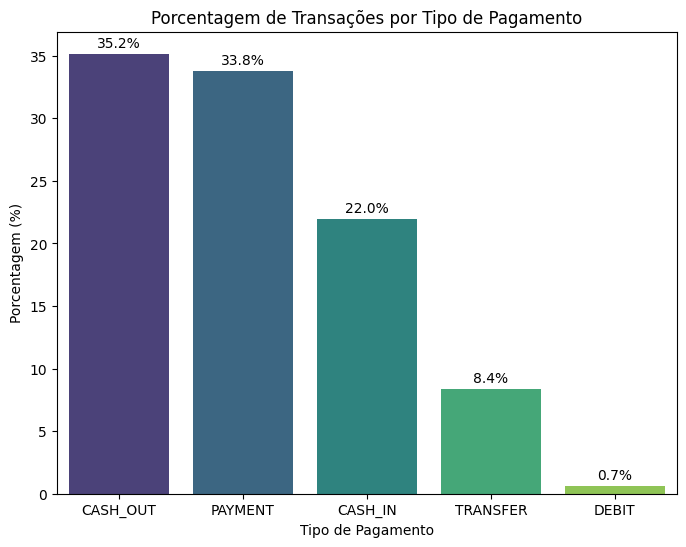

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem de transações por tipo de pagamento e conversão para porcentagem
transaction_counts = df['type'].value_counts(normalize=True) * 100

# Gráfico de barras com eixo Y em porcentagem
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette="viridis")
plt.title("Porcentagem de Transações por Tipo de Pagamento")
plt.xlabel("Tipo de Pagamento")
plt.ylabel("Porcentagem (%)")

# Adicionar valores acima das barras
for i, value in enumerate(transaction_counts.values):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center')

plt.show()


In [ ]:
#Quantidade de tipo de pagamento em porcentagem
data = {
    'type': ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
    'count': [2237500, 2151495, 1399284, 532909, 41432]
}

df1 = pd.DataFrame(data)

# Calcular o total de transações
total = df1['count'].sum()

# Calcular a porcentagem
df1['percentage'] = (df1['count'] / total) * 100

# Exibir o DataFrame com as porcentagens
print(df1)

       type    count  percentage
0  CASH_OUT  2237500   35.166331
1   PAYMENT  2151495   33.814608
2   CASH_IN  1399284   21.992261
3  TRANSFER   532909    8.375622
4     DEBIT    41432    0.651178


In [ ]:
#tipos de pagamentos flegados como fraude
df[df["isFraud"] == 1]["type"].value_counts()

,count
type,
CASH_OUT,4116
TRANSFER,4097


In [ ]:
#tipos de pagamentos flegados como não fraude
df[df["isFraud"] == 0]["type"].value_counts()

,count
type,
CASH_OUT,2233384
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,528812
DEBIT,41432


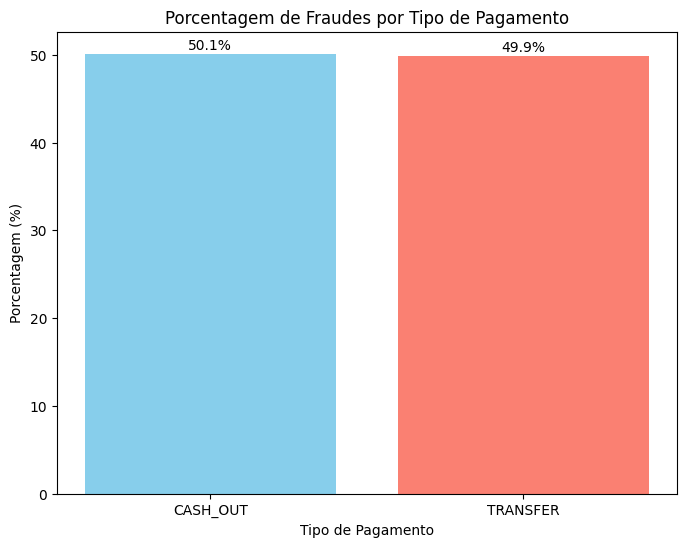

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar as transações fraudulentas e calcular a porcentagem por tipo de pagamento
fraud_payment_types = df[df["isFraud"] == 1]["type"].value_counts(normalize=True) * 100

# Criar o gráfico de barras com o eixo Y em porcentagem
plt.figure(figsize=(8, 6))
plt.bar(fraud_payment_types.index, fraud_payment_types.values, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])

# Adicionar título e rótulos
plt.title('Porcentagem de Fraudes por Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Porcentagem (%)')

# Adicionar os valores percentuais acima das barras
for i, value in enumerate(fraud_payment_types.values):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center')

# Exibir o gráfico
plt.show()


<Figure size 700x400 with 0 Axes>

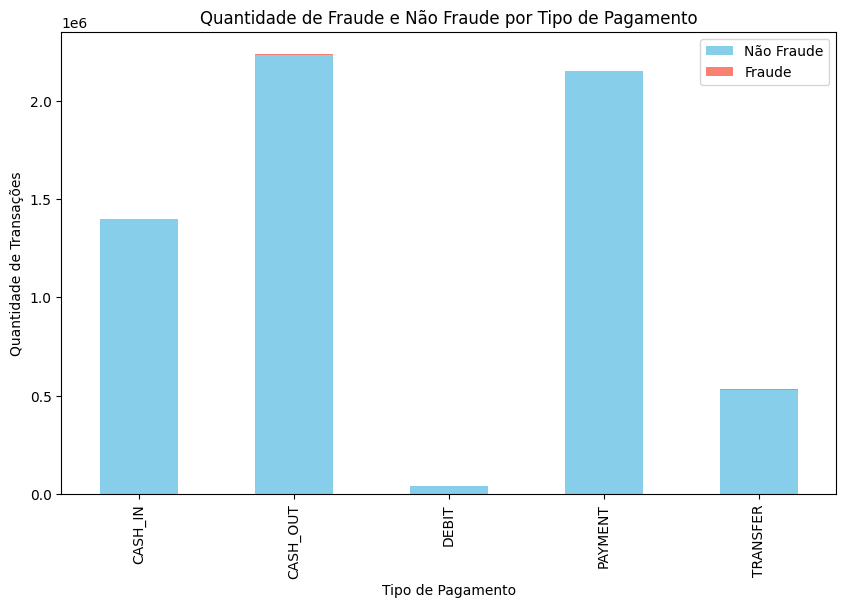

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por 'type' e 'isFraud' e contar as ocorrências
fraud_counts = df.groupby(['type', 'isFraud']).size().unstack()

# Configurar o gráfico de barras
plt.figure(figsize=(7, 4))

# Criar o gráfico de barras empilhadas para mostrar fraudes e não fraudes
fraud_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Adicionar título e rótulos
plt.title('Quantidade de Fraude e Não Fraude por Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Quantidade de Transações')
plt.legend(['Não Fraude', 'Fraude'], loc='upper right')

# Exibir o gráfico
plt.show()


In [ ]:
# Percentuais de Fraudes e não Fraudes
Fraud_Percentage = df['isFraud'].value_counts(normalize=True)[1]*100
NoFraud_Percentage = df['isFraud'].value_counts(normalize=True)[0]*100
print(f'Fraud Percentage: {Fraud_Percentage:.2f}%')
print(f'No Fraud Percentage: {NoFraud_Percentage:.2f}%')

Fraud Percentage: 0.13%
No Fraud Percentage: 99.87%


In [ ]:
# Agrupar por 'nameDest' para contar o número de transações e somar os valores
result = df.groupby('nameDest').agg(
    trans_count=('nameDest', 'size'),  # Quantidade de transações
    total_amount=('amount', 'sum')     # Soma dos valores de 'amount'
).reset_index()

# Exibir o resultado
print(result)

            nameDest  trans_count  total_amount
0        C1000004082            6    2259324.39
1        C1000004940           13    2534004.05
2        C1000013769           13    6204082.94
3         C100001587            9    1404313.66
4        C1000015936           16    2267960.19
...              ...          ...           ...
2722357   M999998692            1       3156.54
2722358    M99999900            1      34263.71
2722359   M999999089            1      16725.52
2722360   M999999543            1      19365.23
2722361   M999999784            1       2327.35

[2722362 rows x 3 columns]


In [ ]:
# Valores maximos com fraude
df_fraud = df[df['isFraud'] == 1]

# Ordenar as transações fraudulentas pelo valor de 'amount' em ordem decrescente
df_sort = df_fraud.sort_values(by='amount', ascending=False)

# Exibir as 5 maiores transações fraudulentas
df_sort.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3760283,279,CASH_OUT,10000000.0,C1214015158,10000000.00,0.00,C2110157840,0.00,10000000.00,1,0
5987587,409,CASH_OUT,10000000.0,C97242201,10000000.00,0.00,C786701128,8496.86,10008496.86,1,0
1707592,160,CASH_OUT,10000000.0,C525906402,10000000.00,0.00,C43869769,2145275.47,12145275.47,1,0
1707591,160,TRANSFER,10000000.0,C752627210,27670038.08,17670038.08,C1853789265,0.00,0.00,1,0
1707590,160,CASH_OUT,10000000.0,C2068007279,10000000.00,0.00,C836488544,158643.25,10158643.25,1,0


In [ ]:
# Valores minimos com fraude
df_fraud = df[df['isFraud'] == 1]

# Ordenar as transações fraudulentas pelo valor de 'amount' em ordem decrescente
df_sort = df_fraud.sort_values(by='amount', ascending=True)

# Exibir as 5 maiores transações fraudulentas
df_sort.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0


In [ ]:
# Valores maximos sem fraude
df_fraud = df[df['isFraud'] == 0]

# Ordenar as transações fraudulentas pelo valor de 'amount' em ordem decrescente
df_sort = df_fraud.sort_values(by='amount', ascending=False)

# Exibir as 5 maiores transações fraudulentas
df_sort.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0,0
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0,0
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0,0
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0,0
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0


In [ ]:
# Valores minimos sem fraude
df_fraud = df[df['isFraud'] == 0]

# Ordenar as transações fraudulentas pelo valor de 'amount' em ordem decrescente
df_sort = df_fraud.sort_values(by='amount', ascending=True)

# Exibir as 5 maiores transações fraudulentas
df_sort.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4736180,332,CASH_OUT,0.01,C1496340830,0.00,0.00,C554562342,262792.79,262792.8,0,0
3027913,233,PAYMENT,0.02,C1371059152,0.00,0.00,M1506318282,0.00,0.0,0,0
4077303,301,PAYMENT,0.02,C421116740,0.00,0.00,M410442874,0.00,0.0,0,0
2359430,190,PAYMENT,0.02,C344473063,33192.97,33192.95,M646412904,0.00,0.0,0,0
6002642,428,PAYMENT,0.03,C1909969960,0.00,0.00,M157485741,0.00,0.0,0,0


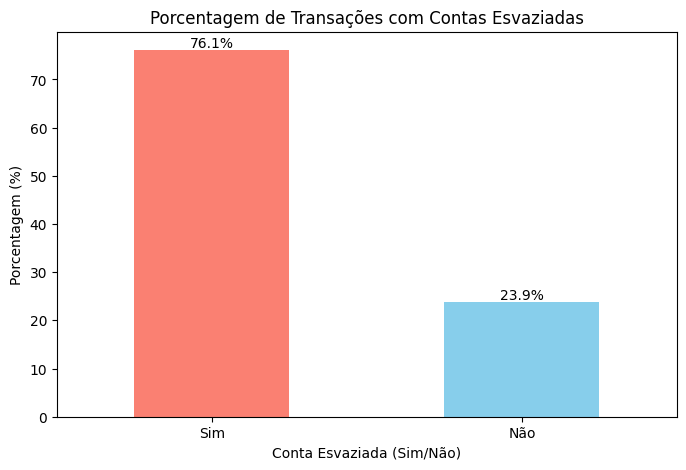

In [ ]:
import matplotlib.pyplot as plt

# Contar as transações onde as contas foram esvaziadas (True/False) e calcular a porcentagem
df_vazia_counts = df_vazia.value_counts(normalize=True) * 100  # Em porcentagem

# Criar o gráfico de barras com os valores em porcentagem
plt.figure(figsize=(8, 5))
df_vazia_counts.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Porcentagem de Transações com Contas Esvaziadas")
plt.xlabel("Conta Esvaziada (Sim/Não)")
plt.ylabel("Porcentagem (%)")

# Adicionar valores percentuais acima das barras
for i, value in enumerate(df_vazia_counts):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center')

# Ajustar os rótulos no eixo X
plt.xticks([0, 1], labels=["Sim", "Não"], rotation=0)
plt.show()


In [ ]:
#Valor médio dos valores fraudulentos
media_fraude = df[df['isFraud'] == 1]['amount'].mean()

# Exibir o resultado
print(f"Média das transações fraudulentas:", media_fraude)

Média das transações fraudulentas: 1467967.299140387


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criar a coluna 'day' calculando os dias a partir de 'step' (considerando 24 horas por dia)
df['day'] = (df['step'] // 24) + 1

# Criar a coluna 'hour', que calcula as horas restantes no dia a partir de 'step'
df['hour'] = (df['day'] * 24) - df['step']

# Criar a coluna 'typeDest', pegando o primeiro caractere de 'nameDest'
df['typeDest'] = df['nameDest'].str[0]

# Criar a coluna 'emptyAccount', verificando se a conta foi esvaziada
df['emptyAccount'] = np.where((df['oldbalanceOrg'] > 0) & (df['newbalanceOrig'] == 0), True, False)

# Exibir as primeiras linhas do DataFrame para verificar o resultado
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  day  \
0  M1979787155             0.0             0.0        0               0    1   
1  M2044282225             0.0             0.0        0               0    1   
2   C553264065             0.0             0.0        1               0    1   
3    C38997010         21182.0             0.0        1               0    1   
4  M1230701703             0.0             0.0        0               0    1   

   hour typeDest  emptyAccount  
0    23        M         False  
1 

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,hour
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,1.050316e+01,8.678546e+00
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,5.922111e+00,4.321799e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,5.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,1.000000e+01,8.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,1.400000e+01,1.200000e+01
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,3.100000e+01,2.400000e+01


In [ ]:
# Filtrar as transações fraudulentas (onde isFraud == 1)
df_fraud = df[df['isFraud'] == 1]

# Agrupar por 'typeDest' e contar as ocorrências de fraudes por tipo
fraud_count_by_typeDest = df_fraud.groupby('typeDest').size()

# Exibir o resultado
print(fraud_count_by_typeDest)


typeDest
C    8213
dtype: int64


In [ ]:
# Filtrar as transações fraudulentas (onde isFraud == 1)
df_fraud = df[df['isFraud'] == 0]

# Agrupar por 'typeDest' e contar as ocorrências de fraudes por tipo
fraud_count_by_typeDest = df_fraud.groupby('typeDest').size()

# Exibir o resultado
print(fraud_count_by_typeDest)


typeDest
C    4202912
M    2151495
dtype: int64


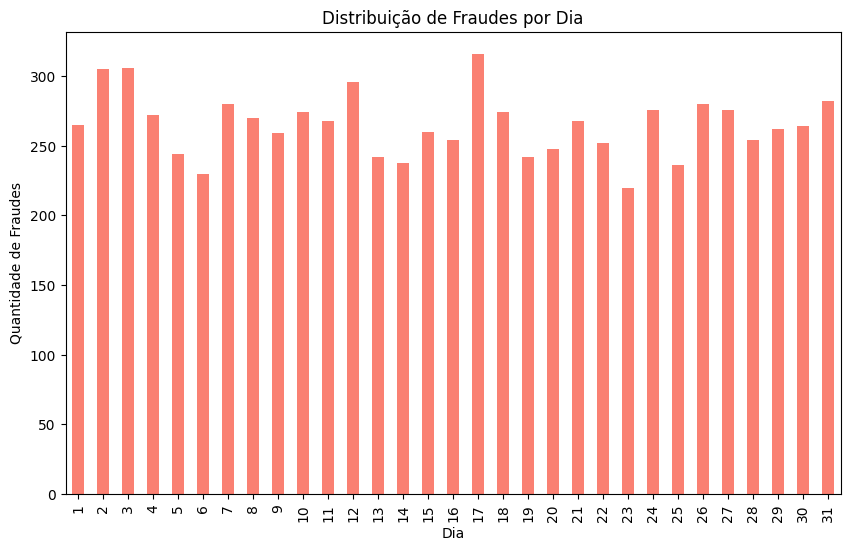

In [ ]:
import matplotlib.pyplot as plt

# Filtrar as transações fraudulentas
df_fraud = df[df['isFraud'] == 1]

# Contar fraudes por dia
fraud_count_by_day = df_fraud.groupby('day').size()

# Criar gráfico de barras para a quantidade de fraudes por dia
plt.figure(figsize=(10, 6))
fraud_count_by_day.plot(kind='bar', color='salmon')

# Adicionar título e rótulos
plt.title('Distribuição de Fraudes por Dia')
plt.xlabel('Dia')
plt.ylabel('Quantidade de Fraudes')

# Exibir o gráfico
plt.show()


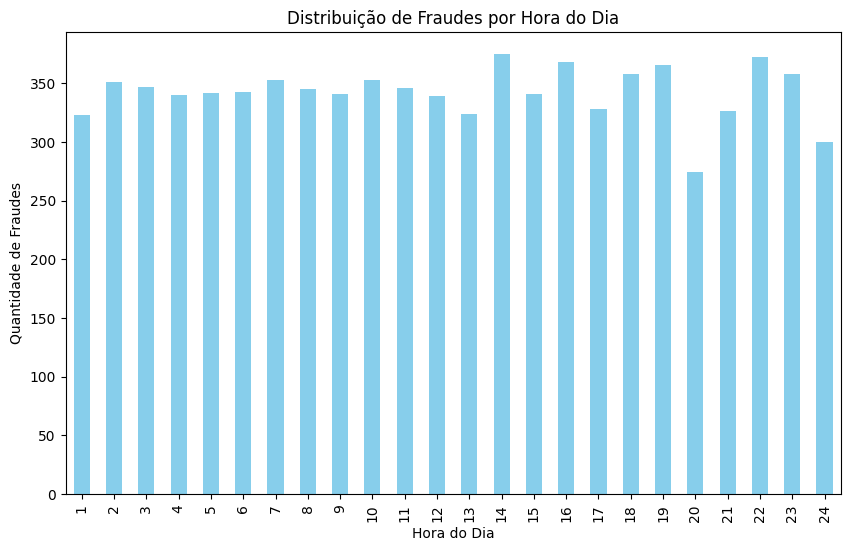

In [ ]:
# Contar fraudes por hora
fraud_count_by_hour = df_fraud.groupby('hour').size()

# Criar gráfico de barras para a quantidade de fraudes por hora
plt.figure(figsize=(10, 6))
fraud_count_by_hour.plot(kind='bar', color='skyblue')

# Adicionar título e rótulos
plt.title('Distribuição de Fraudes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Fraudes')

# Exibir o gráfico
plt.show()


<Figure size 1200x800 with 0 Axes>

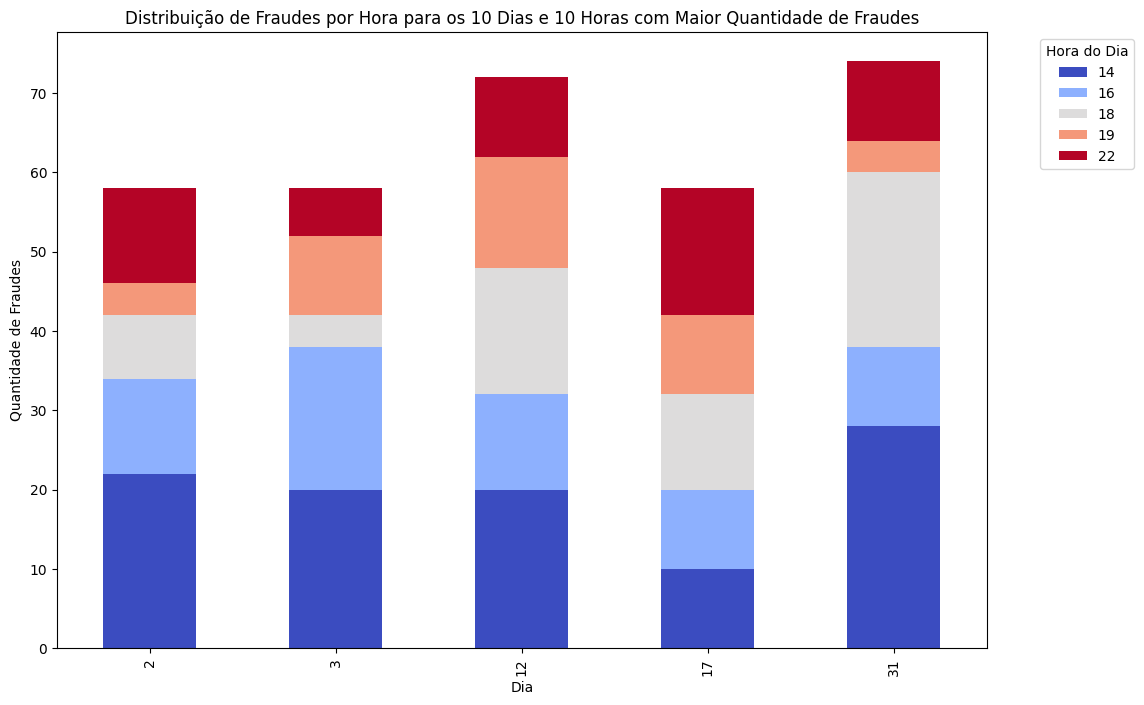

In [ ]:
import matplotlib.pyplot as plt

# Filtrar para incluir apenas transações fraudulentas nos top 10 dias e top 10 horas
top_10_days = df[df['isFraud'] == 1].groupby('day').size().nlargest(5).index
top_10_hours = df[df['isFraud'] == 1].groupby('hour').size().nlargest(5).index
filtered_fraud = df[(df['isFraud'] == 1) & (df['day'].isin(top_10_days)) & (df['hour'].isin(top_10_hours))]

# Agrupar fraudes por dia e hora para o conjunto filtrado
fraud_count_top_days_hours = filtered_fraud.groupby(['day', 'hour']).size().unstack()

# Criar gráfico de barras empilhadas para os dias e horas selecionados nas transações fraudulentas
plt.figure(figsize=(12, 8))
fraud_count_top_days_hours.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 8))

# Adicionar título e rótulos
plt.title("Distribuição de Fraudes por Hora para os 10 Dias e 10 Horas com Maior Quantidade de Fraudes")
plt.xlabel("Dia")
plt.ylabel("Quantidade de Fraudes")
plt.legend(title="Hora do Dia", bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.show()


isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


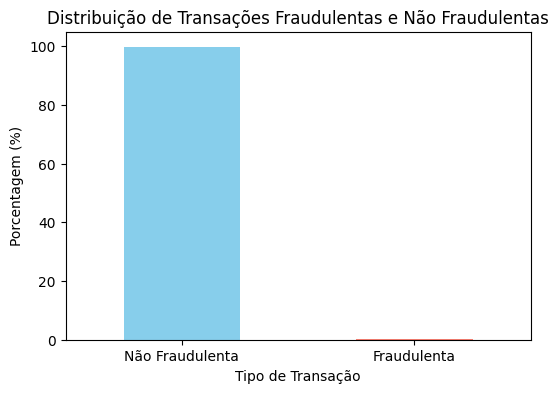

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar a quantidade de transações fraudulentas e não fraudulentas
fraud_counts = df['isFraud'].value_counts(normalize=True) * 100  # Em porcentagem

# Exibir as porcentagens de fraude e não fraude
print(fraud_counts)

# Criar o gráfico de barras para mostrar o desbalanceamento
plt.figure(figsize=(6, 4))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribuição de Transações Fraudulentas e Não Fraudulentas")
plt.xlabel("Tipo de Transação")
plt.ylabel("Porcentagem (%)")
plt.xticks(ticks=[0, 1], labels=['Não Fraudulenta', 'Fraudulenta'], rotation=0)
plt.ylim(0, 105)
plt.show()
